<a href="https://colab.research.google.com/github/vikram4690/Stock-prediction/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive//AA.csv')

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,6.532155,6.556185,6.532155,6.532155,1.536658,55900
1,1962-01-03,6.532155,6.632280,6.524145,6.632280,1.560212,74500
2,1962-01-04,6.632280,6.664320,6.632280,6.632280,1.560212,80500
3,1962-01-05,6.632280,6.656310,6.616260,6.624270,1.558326,70500
4,1962-01-08,6.608250,6.608250,6.339915,6.408000,1.507450,93800
5,1962-01-09,6.408000,6.508125,6.355935,6.355935,1.495202,64500
6,1962-01-10,6.355935,6.408000,6.339915,6.363945,1.497087,34500
7,1962-01-11,6.347925,6.347925,6.323895,6.339915,1.491434,27900
8,1962-01-12,6.339915,6.347925,6.207750,6.207750,1.460343,26500
9,1962-01-15,6.139665,6.139665,6.055560,6.055560,1.424540,64500


In [ ]:
df = pd.DataFrame(df)

# Convert date strings to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract numeric features from the dates
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop(columns=['Date'])

print(df)

           Open      High       Low     Close  Adj Close    Volume  Year  \
0      6.532155  6.556185  6.532155  6.532155   1.536658     55900  1962   
1      6.532155  6.632280  6.524145  6.632280   1.560212     74500  1962   
2      6.632280  6.664320  6.632280  6.632280   1.560212     80500  1962   
3      6.632280  6.656310  6.616260  6.624270   1.558326     70500  1962   
4      6.608250  6.608250  6.339915  6.408000   1.507450     93800  1962   
...         ...       ...       ...       ...        ...       ...   ...   
14658  7.270000  7.386000  6.730000  6.840000   6.840000  11916400  2020   
14659  6.510000  6.790000  6.050000  6.550000   6.550000  10075400  2020   
14660  6.550000  6.600000  6.000000  6.070000   6.070000   9615600  2020   
14661  6.160000  6.620000  6.060000  6.160000   6.160000  12502000  2020   
14662  5.960000  6.610000  5.710000  6.250000   6.250000  10443300  2020   

       Month  Day  
0          1    2  
1          1    3  
2          1    4  
3      

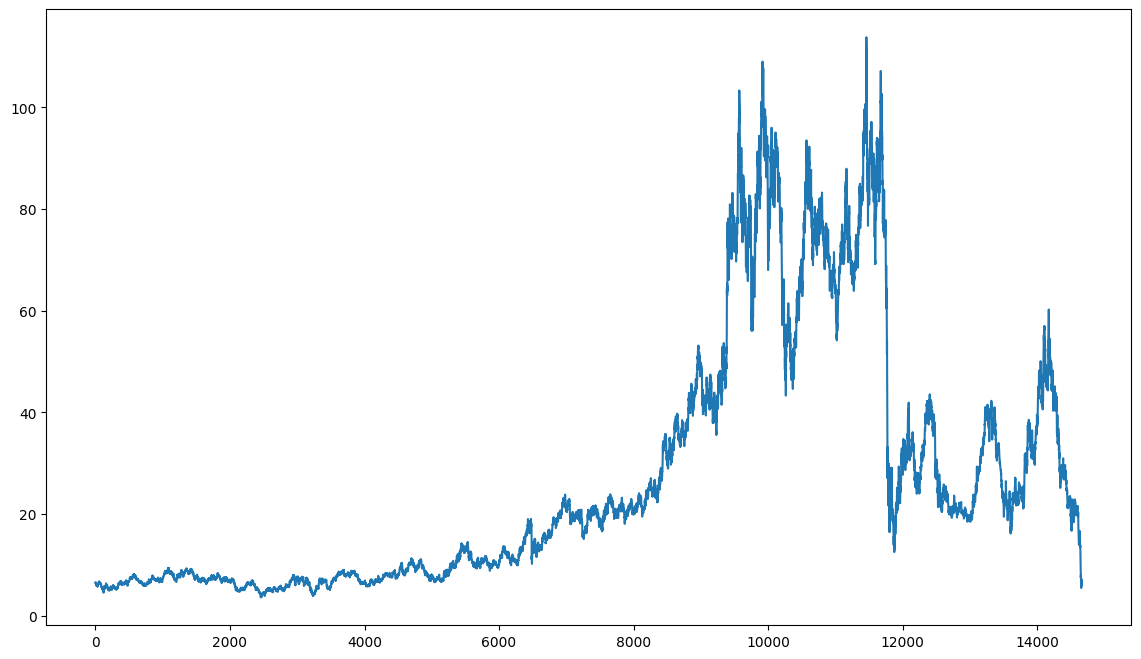

In [ ]:
 plt.figure(figsize=(14, 8))
 plt.plot(df['Close'], label='Closing Price')

In [ ]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

In [ ]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Open - Close,High - Low
0,6.532155,6.556185,6.532155,6.532155,1.536658,55900,1962,1,2,0.000000,0.024030
1,6.532155,6.632280,6.524145,6.632280,1.560212,74500,1962,1,3,-0.100125,0.108135
2,6.632280,6.664320,6.632280,6.632280,1.560212,80500,1962,1,4,0.000000,0.032040
3,6.632280,6.656310,6.616260,6.624270,1.558326,70500,1962,1,5,0.008010,0.040050
4,6.608250,6.608250,6.339915,6.408000,1.507450,93800,1962,1,8,0.200250,0.268335
5,6.408000,6.508125,6.355935,6.355935,1.495202,64500,1962,1,9,0.052065,0.152190
6,6.355935,6.408000,6.339915,6.363945,1.497087,34500,1962,1,10,-0.008010,0.068085
7,6.347925,6.347925,6.323895,6.339915,1.491434,27900,1962,1,11,0.008010,0.024030
8,6.339915,6.347925,6.207750,6.207750,1.460343,26500,1962,1,12,0.132165,0.140175
9,6.139665,6.139665,6.055560,6.055560,1.424540,64500,1962,1,15,0.084105,0.084105


In [ ]:
X = df[['Year','Month','Day', 'Open - Close', 'High - Low']]
X.head(10)

,Year,Month,Day,Open - Close,High - Low
0,1962,1,2,0.000000,0.024030
1,1962,1,3,-0.100125,0.108135
2,1962,1,4,0.000000,0.032040
3,1962,1,5,0.008010,0.040050
4,1962,1,8,0.200250,0.268335
5,1962,1,9,0.052065,0.152190
6,1962,1,10,-0.008010,0.068085
7,1962,1,11,0.008010,0.024030
8,1962,1,12,0.132165,0.140175
9,1962,1,15,0.084105,0.084105


In [ ]:
Y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [ ]:
Y

array([ 1, -1, -1, ...,  1,  1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [ ]:
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

In [ ]:
print('Train_data Accuracy: %.2f' % accuracy_train)
print('Test_data Accuracy: %.2f' % accuracy_test)

Train_data Accuracy: 0.76
Test_data Accuracy: 0.52


In [ ]:
prediction = model.predict(X_test)

In [ ]:
#rmse
rms = np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(prediction)),2)))
rms

1.3806392567316732

In [ ]:
actual_prediction_data = pd.DataFrame({'Actual Close': Y_test, 'Predicted Close value': prediction_classification})

In [ ]:
actual_prediction_data.head(10)

,Actual Close,Predicted Close value
0,1,-1
1,-1,-1
2,-1,-1
3,1,-1
4,1,-1
5,1,-1
6,-1,-1
7,1,1
8,-1,1
9,1,1


In [ ]:
y = df['Close']

In [ ]:
y.head(10)

0    6.532155
1    6.632280
2    6.632280
3    6.624270
4    6.408000
5    6.355935
6    6.363945
7    6.339915
8    6.207750
9    6.055560
Name: Close, dtype: float64